In [1]:
import numpy as np
import Loader
import Transformer
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.style.use('dark_background')

#### Very epic server push to github
It only requires a bunch of unnecessary setup

In [99]:
!git add .
!git commit -m "SVM 93-94% val test accuracy"

[main 08f5ad7] SVM 93-94% val test accuracy
 2 files changed, 19 insertions(+), 18 deletions(-)


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import MeanSquaredError

2022-11-02 00:05:53.640333: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-02 00:05:53.640356: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#note loading data also shuffles order of the data
scaf = True
compoundsTrain, smilesTrain, labelsTrain, compoundDataTrain, activitiesTrain = Loader.getTrain(defaultValue=0, scaffold=scaf)
compoundsTest, smilesTest, labelsTest, compoundDataTest, activitiesTest = Loader.getTest(defaultValue=0, scaffold=scaf)
compoundsValidate, smilesValidate, labelsValidate, compoundDataValidate, activitiesValidate = Loader.getValidate(defaultValue=0, scaffold=scaf) 
print(len(labelsTrain))

228


In [8]:
print(compoundsTrain[0:10])
print(compoundsValidate[0:10])

['ZINC83315' 'PostEra-ALP-POS-42f3de95-3' 'GoStar-gvk_125485529'
 'CHEMBL2107179' 'GoStar-gvk_125468763' '8331666'
 'world_drugs-ZINC000014880004' 'GoStar-gvk_125563883' 'ZINC25973757'
 'GoStar-gvk_125563996']
['CHEMBL6' 'ZINC000040899447' 'GoStar-gvk_125564044'
 'world_drugs-ZINC000049538599' 'PostEra-ALP-POS-88a7a97e-26'
 'GoStar-gvk_124984521' 'ZINC1436' 'CHEMBL504548' 'GoStar-gvk_125564017'
 'emolecules-22701132']


## Testing mean zero for PCA
 Doesn't actually do anything, but if you enforce std=1, it most certainly does

In [4]:
#for PCA mean's should be zero
#trainPCA, testPCA, valPCA = Transformer.setMeanZero(compoundDataTrain, compoundDataTest, compoundDataValidate)
trainPCA, testPCA, valPCA = Transformer.normalizeData(compoundDataTrain, compoundDataTest, compoundDataValidate, newMean=0, newStd=1)
#reduce dimension through PCA
#in order endDims sections are chi, paoe, smr, slogp, estate_vsa, vsa_estate, fr
labelsPCA2, trainPCA2, testPCA2, valPCA2 = Transformer.applyPCA(labelsTrain,  compoundDataTrain, 
                                                            compoundDataTest, compoundDataValidate,
                                                            endDims=[1,2,8,5,6,8,4,16])
print("\n")
labelsPCA, trainPCA, testPCA, valPCA = Transformer.applyPCA(labelsTrain,  trainPCA, 
                                                            testPCA, valPCA,
                                                            endDims=[1,2,8,5,6,8,4,16])
print("PCA done, new dimensions:", len(labelsPCA))

bcut2d retention: [0.99364773]
	total: 99.36477273412298%
chi retention: [0.9541968  0.02524522]
	total: 97.94420208614241%
paoe retention: [0.31495127 0.19509321 0.1390042  0.08838179 0.07155396 0.04590061
 0.03243    0.02673268]
	total: 91.4047745955917%
smr retention: [0.50634726 0.24568468 0.08792319 0.07435827 0.03943113]
	total: 95.37445211162566%
slogp retention: [0.44620276 0.22134465 0.15753302 0.04213752 0.03159298 0.02850562]
	total: 92.73165471968969%
estate_vsa retention: [0.29224011 0.18964809 0.14361318 0.10642656 0.07394495 0.06391846
 0.05513575 0.04672882]
	total: 97.16559282999313%
vsa_estate retention: [0.49255304 0.32866098 0.09719245 0.03637439]
	total: 95.47808596198047%
fr retention: [0.32153498 0.12578177 0.09944384 0.0570485  0.05494644 0.04503917
 0.03646285 0.02896244 0.02597271 0.02289905 0.01957315 0.01726896
 0.01514306 0.01174706 0.01137903 0.00991508]
	total: 90.31180947444012%


bcut2d retention: [0.44518785]
	total: 44.51878518382591%
chi retention: [

## test NN with normalized then PCA data

In [19]:
#note loading data also shuffles order of the data
compoundsTrain, smilesTrain, labelsTrain, compoundDataTrain, activitiesTrain = Loader.getTrain(defaultValue=0)
compoundsTest, smilesTest, labelsTest, compoundDataTest, activitiesTest = Loader.getTest(defaultValue=0)
compoundsValidate, smilesValidate, labelsValidate, compoundDataValidate, activitiesValidate = Loader.getValidate(defaultValue=0)

trainPCA, testPCA, valPCA = Transformer.normalizeData(compoundDataTrain, compoundDataTest, compoundDataValidate, newMean=0, newStd=1)

labelsPCA, trainPCA, testPCA, valPCA = Transformer.applyPCA(labelsTrain,  trainPCA, 
                                                            testPCA, valPCA,
                                                            endDims=[6,4,12,8,10,9,8,54])
#orig dim: 8, 12, 14, 10, 12, 11, 10, 85
#not really saving much

#normalize again afterwards
trainPCA, testPCA, valPCA = Transformer.normalizeData(trainPCA, testPCA, valPCA, newMean=0, newStd=1)


trainClass = Transformer.toBinaryClassification(activitiesTrain)
testClass = Transformer.toBinaryClassification(activitiesTest)
valClass = Transformer.toBinaryClassification(activitiesValidate)

bcut2d retention: [0.44518785 0.21714606 0.13167578 0.08799747 0.05373811 0.0366825 ]
	total: 97.24277693290423%
chi retention: [0.91593304 0.04804084 0.02380641 0.0065305 ]
	total: 99.43107968851044%
paoe retention: [0.17079478 0.11592686 0.1020541  0.08818081 0.08417408 0.07468112
 0.06986076 0.06139847 0.0539834  0.0518696  0.04844406 0.04095473]
	total: 96.23227678970301%
smr retention: [0.28813353 0.15256573 0.12836015 0.10617274 0.10519691 0.08748111
 0.06158387 0.04312811]
	total: 97.26221517227397%
slogp retention: [0.25577105 0.15030562 0.11782795 0.11180007 0.09478744 0.08315124
 0.06122519 0.04014763 0.03454359 0.02695222]
	total: 97.65119978585788%
estate_vsa retention: [0.23759845 0.15827195 0.12415712 0.09748258 0.09220378 0.07418966
 0.062007   0.05416416 0.05053938]
	total: 95.0614096515039%
vsa_estate retention: [0.25666593 0.17493793 0.1209148  0.11940444 0.09135497 0.07517842
 0.0618297  0.05415204]
	total: 95.44382293865245%
fr retention: [0.07236954 0.05147521 0.03

In [20]:
print(np.std(trainPCA, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [22]:
inputDim = len(labelsPCA)


l1Reg = keras.regularizers.L1(.001)

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inputDim, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(250, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(400, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(200, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(100, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(50, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(trainPCA, trainClass, 
                    validation_data = (valPCA, valClass), epochs=200, batch_size=10)

Epoch 1/200
272/272 [==============================] - 2s 7ms/step - loss: 6.3604 - accuracy: 0.8509 - val_loss: 1.5847 - val_accuracy: 0.8765
Epoch 2/200
272/272 [==============================] - 2s 7ms/step - loss: 1.1193 - accuracy: 0.9047 - val_loss: 0.9101 - val_accuracy: 0.8824
Epoch 3/200
272/272 [==============================] - 2s 7ms/step - loss: 0.7438 - accuracy: 0.9194 - val_loss: 0.7495 - val_accuracy: 0.8882
Epoch 4/200
272/272 [==============================] - 2s 7ms/step - loss: 0.5988 - accuracy: 0.9257 - val_loss: 0.6253 - val_accuracy: 0.9000
Epoch 5/200
272/272 [==============================] - 2s 7ms/step - loss: 0.5216 - accuracy: 0.9319 - val_loss: 0.5399 - val_accuracy: 0.9059
Epoch 6/200
272/272 [==============================] - 2s 7ms/step - loss: 0.4791 - accuracy: 0.9371 - val_loss: 0.5097 - val_accuracy: 0.9206
Epoch 7/200
272/272 [==============================] - 2s 7ms/step - loss: 0.4414 - accuracy: 0.9459 - val_loss: 0.4820 - val_accuracy: 0.9324

Epoch 58/200
272/272 [==============================] - 2s 7ms/step - loss: 0.2427 - accuracy: 0.9775 - val_loss: 0.5304 - val_accuracy: 0.9059
Epoch 59/200
272/272 [==============================] - 2s 7ms/step - loss: 0.2240 - accuracy: 0.9868 - val_loss: 0.5672 - val_accuracy: 0.8971
Epoch 60/200
272/272 [==============================] - 2s 7ms/step - loss: 0.2116 - accuracy: 0.9893 - val_loss: 0.5339 - val_accuracy: 0.9118
Epoch 61/200
272/272 [==============================] - 2s 7ms/step - loss: 0.2454 - accuracy: 0.9801 - val_loss: 0.4880 - val_accuracy: 0.9088
Epoch 62/200
272/272 [==============================] - 2s 7ms/step - loss: 0.2249 - accuracy: 0.9834 - val_loss: 0.5464 - val_accuracy: 0.9176
Epoch 63/200
272/272 [==============================] - 2s 6ms/step - loss: 0.2406 - accuracy: 0.9787 - val_loss: 0.5826 - val_accuracy: 0.9059
Epoch 64/200
272/272 [==============================] - 2s 7ms/step - loss: 0.2115 - accuracy: 0.9886 - val_loss: 0.4867 - val_accuracy:

Epoch 115/200
272/272 [==============================] - 2s 7ms/step - loss: 0.1892 - accuracy: 0.9912 - val_loss: 0.6218 - val_accuracy: 0.9000
Epoch 116/200
272/272 [==============================] - 2s 6ms/step - loss: 0.1952 - accuracy: 0.9912 - val_loss: 0.6565 - val_accuracy: 0.8853
Epoch 117/200
272/272 [==============================] - 2s 7ms/step - loss: 0.2136 - accuracy: 0.9856 - val_loss: 0.6346 - val_accuracy: 0.9000
Epoch 118/200
272/272 [==============================] - 2s 7ms/step - loss: 0.2241 - accuracy: 0.9823 - val_loss: 0.5683 - val_accuracy: 0.9029
Epoch 119/200
272/272 [==============================] - 2s 7ms/step - loss: 0.2267 - accuracy: 0.9816 - val_loss: 0.5703 - val_accuracy: 0.9029
Epoch 120/200
272/272 [==============================] - 2s 7ms/step - loss: 0.2125 - accuracy: 0.9871 - val_loss: 0.5589 - val_accuracy: 0.8971
Epoch 121/200
272/272 [==============================] - 2s 7ms/step - loss: 0.1916 - accuracy: 0.9941 - val_loss: 0.5283 - val_ac

0.9922708868980408
0.8941176533699036


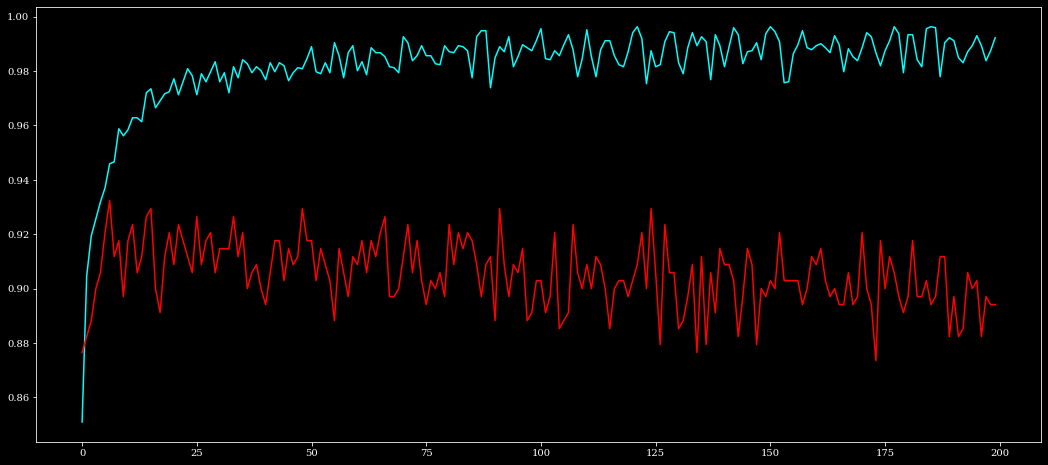

In [24]:
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(history.history["accuracy"], color="cyan")
ax.plot(history.history["val_accuracy"], color="red")

print(history.history["accuracy"][-1])
print(history.history["val_accuracy"][-1])

## Same thing (No PCA)

In [2]:
compoundsTrain, smilesTrain, labelsTrain, compoundDataTrain, activitiesTrain = Loader.getTrain(defaultValue=0)
compoundsTest, smilesTest, labelsTest, compoundDataTest, activitiesTest = Loader.getTest(defaultValue=0)
compoundsValidate, smilesValidate, labelsValidate, compoundDataValidate, activitiesValidate = Loader.getValidate(defaultValue=0)

trainData, testData, valData = Transformer.normalizeData(compoundDataTrain, compoundDataTest, 
                                                         compoundDataValidate, newMean=0, newStd=1)

trainClass = Transformer.toBinaryClassification(activitiesTrain)
testClass = Transformer.toBinaryClassification(activitiesTest)
valClass = Transformer.toBinaryClassification(activitiesValidate)

In [5]:
inputDim = len(labelsTrain)


l1Reg = keras.regularizers.L1(.001)

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inputDim, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(250, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(400, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(200, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(100, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(50, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(trainData, trainClass, 
                    validation_data = (valData, valClass), epochs=200, batch_size=10)

Epoch 1/200
272/272 [==============================] - 6s 12ms/step - loss: 7.0084 - accuracy: 0.8690 - val_loss: 1.7978 - val_accuracy: 0.8647
Epoch 2/200
272/272 [==============================] - 3s 9ms/step - loss: 1.1824 - accuracy: 0.9039 - val_loss: 0.8741 - val_accuracy: 0.9118
Epoch 3/200
272/272 [==============================] - 3s 10ms/step - loss: 0.7307 - accuracy: 0.9150 - val_loss: 0.6691 - val_accuracy: 0.8941
Epoch 4/200
272/272 [==============================] - 3s 11ms/step - loss: 0.5798 - accuracy: 0.9198 - val_loss: 0.6056 - val_accuracy: 0.8765
Epoch 5/200
272/272 [==============================] - 3s 10ms/step - loss: 0.4997 - accuracy: 0.9356 - val_loss: 0.5260 - val_accuracy: 0.9000
Epoch 6/200
272/272 [==============================] - 3s 11ms/step - loss: 0.4587 - accuracy: 0.9360 - val_loss: 0.5017 - val_accuracy: 0.9206
Epoch 7/200
272/272 [==============================] - 3s 10ms/step - loss: 0.4277 - accuracy: 0.9441 - val_loss: 0.4475 - val_accuracy: 

272/272 [==============================] - 3s 12ms/step - loss: 0.1960 - accuracy: 0.9890 - val_loss: 0.4690 - val_accuracy: 0.9147
Epoch 114/200
272/272 [==============================] - 3s 11ms/step - loss: 0.1904 - accuracy: 0.9904 - val_loss: 0.4610 - val_accuracy: 0.9206
Epoch 115/200
272/272 [==============================] - 3s 12ms/step - loss: 0.2100 - accuracy: 0.9827 - val_loss: 0.4761 - val_accuracy: 0.9235
Epoch 116/200
272/272 [==============================] - 3s 13ms/step - loss: 0.2262 - accuracy: 0.9809 - val_loss: 0.4526 - val_accuracy: 0.9235
Epoch 117/200
272/272 [==============================] - 3s 12ms/step - loss: 0.2131 - accuracy: 0.9860 - val_loss: 0.4968 - val_accuracy: 0.9118
Epoch 118/200
272/272 [==============================] - 3s 13ms/step - loss: 0.2091 - accuracy: 0.9842 - val_loss: 0.4545 - val_accuracy: 0.9147
Epoch 119/200
272/272 [==============================] - 4s 14ms/step - loss: 0.1897 - accuracy: 0.9919 - val_loss: 0.5585 - val_accuracy:

0.9874861836433411 0.9959514141082764
0.9205882549285889 0.949999988079071


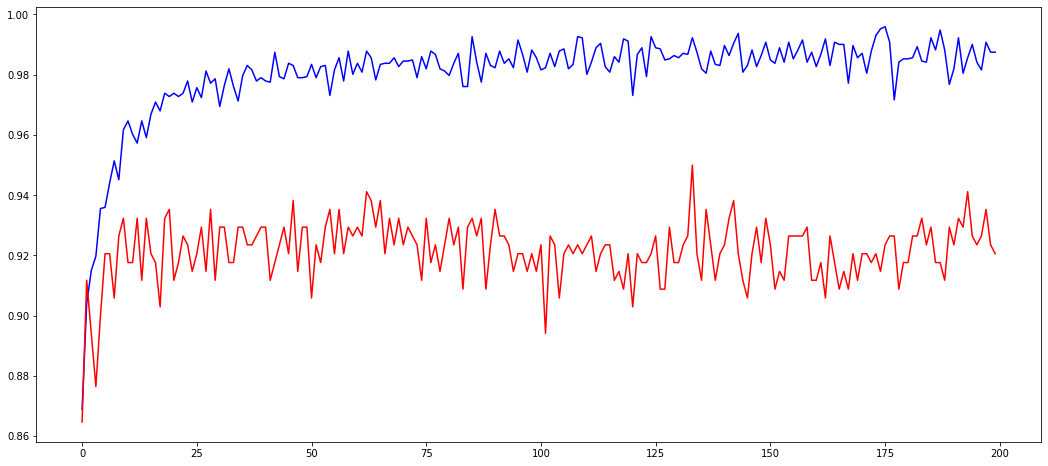

In [7]:
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(history.history["accuracy"], color="blue")
ax.plot(history.history["val_accuracy"], color="red")

print(history.history["accuracy"][-1], max(history.history["accuracy"]))
print(history.history["val_accuracy"][-1], max(history.history["val_accuracy"]))

## Playing with SVM

In [4]:

scaf = False
compoundsTrain, smilesTrain, labelsTrain, compoundDataTrain, activitiesTrain = Loader.getTrain(defaultValue=0, scaffold=scaf)
compoundsTest, smilesTest, labelsTest, compoundDataTest, activitiesTest = Loader.getTest(defaultValue=0, scaffold=scaf)
compoundsValidate, smilesValidate, labelsValidate, compoundDataValidate, activitiesValidate = Loader.getValidate(defaultValue=0, scaffold=scaf) 

#labelsPCA, trainData, testData, valData = Transformer.applyPCA(labelsTrain,  trainData, 
#                                                            testData, valData,
#                                                            endDims=[6,4,12,8,10,9,8,54])



trainData, testData, valData = Transformer.normalizeData(compoundDataTrain, 
                                                         compoundDataTest, compoundDataValidate, 
                                                         newMean=0, newStd=1)

trainClass = Transformer.toBinaryClassification(activitiesTrain)
testClass = Transformer.toBinaryClassification(activitiesTest)
valClass = Transformer.toBinaryClassification(activitiesValidate)

In [5]:
from sklearn import svm
from sklearn.metrics import accuracy_score

maxC = 10

clf=svm.SVC(
    C=maxC,                          # The regularization parameter (default 1)
    kernel='rbf',                   # The kernel type used (RBF: Gaussian Kernel Radial Basis Function)
    degree=1,                       # Degree of polynomial function (ONLY relevant for kernel="poly")
    gamma='scale',                  # The kernel coefficient
    coef0=0.0,                      # If kernel = 'poly'/'sigmoid'
    shrinking=True,                 # To use shrinking heuristic
    probability=False,              # Enable probability estimates
    tol=0.00001,                    # Stopping crierion
    cache_size=200,                 # Size of kernel cache
    class_weight=None,              # The weight of each class
    verbose=False,                  # Enable verbose output
    max_iter= -1,                   # Hard limit on iterations (-1 is no limit)
    decision_function_shape='ovr',  # One-vs-rest or one-vs-one (this don't matter)
    break_ties=False,               # How to handle breaking ties
    random_state=None               # Random state of the model
)

#dataFrame = pd.DataFrame(trainDataPCA)
#dataFrame['labels'] = classTrain

#samp = int(len(df)*percent)
#df = df.sample(n = samp)
#print(len(df))
#Ytrain = df['labels']
#del df['labels']
#Xtrain = df.values

#train model
clf.fit(trainData, trainClass)

trainPred = clf.predict(trainData)
valPred = clf.predict(valData)
testPred = clf.predict(testData)
print("Ein Acc: ", accuracy_score(trainClass, trainPred))
print("Eval Acc: ", accuracy_score(valClass, valPred))
print("Etest Acc: ", accuracy_score(testClass, testPred)) #DO NOT Run this often
#Ein Acc:  0.9642988590357011
#Eval Acc:  0.9147058823529411
#.9323529411764706


#random: 
#Ein Acc:  0.9988958410011042
#Eval Acc:  0.9323529411764706
#Etest Acc:  0.9470588235294117
#scaffold:
#Ein Acc:  0.9977916820022084
#Eval Acc:  0.9294117647058824
#Etest Acc:  0.8941176470588236

Ein Acc:  0.9988958410011042
Eval Acc:  0.9323529411764706
Etest Acc:  0.9470588235294117
